https://vasanth16.github.io

# Comparing Tourist Preferences in Asia and Europe

Sam Childs and Vasanth Rajasekaran

## Table of Contents
1. Introduction 
2. Loading and Cleaning Data 
3. Initial Analysis 
4. Investigating Relationships
5. K-Means Clustering
6. Predicting Ratings
7. Applications 
8. Conclusion

## Part 1: Introduction
Vasanth and I (Sam Childs) will be working together on the final tutorial for this class. We have identified a dataset from UC Irvine which includes review data from travelers on Google Reviews. It is called “Travel Review Rating Dataset”, and it is found in the university’s Machine Learning Repository. We are interested in asking questions about whether average user feedback for a specific type of attraction yields insights into other kinds of attractions. Perhaps certain attraction classes have overlapping sets of fans, or perhaps another attraction class is highly polarizing. We are also wondering about frequency of reviews by attraction class. Perhaps few people who enjoy attraction type A try attraction type B, but the few that do really enjoy the experience. Insights into how markets for travel entertainment clear inefficiently would be of great value to tourism boards and travel companies.

## Initial Questions 
1. Does a reviewer's affinity for certain attraction types in turn show affinity for others?
2. How does tourist affinity differ between Asia and Europe?
3. Can we predict how much a user will like a certain type of attraction based on their other reviews?




## Collaboration Plan
To facilitate collaboration, we set up a private Github repository to share workbooks and data. We will ensure that each commit to the Git repo will include thorough comments documenting the changes. We will meet over the phone weekly to update each other on our progress, or more frequently as necessary to facilitate deadlines. Included in these meetings will be discussions about how to resolve merges/conflicts as they arise during our work.

## Part 2 : Loading and Cleaning Data
### Google Reviews

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#The names list for the data set that is given on the data source website 
googleColumns=[ 'Unique user id '
,'Average ratings on churches' 
,'Average ratings on resorts' 
,'Average ratings on beaches' 
,'Average ratings on parks' 
,'Average ratings on theatres' 
,'Average ratings on museums' 
,'Average ratings on malls' 
,'Average ratings on zoo' 
,'Average ratings on restaurants' 
,'Average ratings on pubs/bars' 
,'Average ratings on local services' 
,'Average ratings on burger/pizza shops' 
,'Average ratings on hotels/other lodgings' 
,'Average ratings on juice bars'
,'Average ratings on art galleries' 
,'Average ratings on dance clubs' 
,'Average ratings on swimming pools' 
,'Average ratings on gyms' 
,'Average ratings on bakeries' 
,'Average ratings on beauty & spas' 
,'Average ratings on cafes' 
,'Average ratings on view points' 
,'Average ratings on monuments' 
,'Average ratings on gardens']

In [9]:
googleData = pd.read_csv('./data/google_review_ratings.csv', header = 0, names=googleColumns, index_col=False) 
# reads ratings CSV into pandas using header 0 and names from the list above

googleData = googleData.set_index('Unique user id ') # sets USER ID Column to index
googleData = googleData.drop('Average ratings on local services',axis=1) # This column is corrupted and we decided to remove it
googleData # shows dataframe

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
Unique user id,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


#### Cleaning Google reviews data 

The travel data set was a relatively simple to import and format correctly. The first step was to define the column names as per the UCI ML website, there is a large list of names at the top. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false inorder to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names. We decided to remove the "Local Services" column because it had several corrupted values. It does not exist in the Tripadvisor dataset, so its removal does not affect our analysis.

### Tripadvisor Data 

We found an additional dataset from Tripadvisor for average review score on various categories from travelers in Asia. Although not all of the attributes match between the datasets, we do have some overlapping that will allow for some comparisons between the two. Important to note: The ratings on trip advisor are 0-4 rather than the 1-5 found on the google data (we account for this in our analysis)

Link: https://archive.ics.uci.edu/ml/datasets/Travel+Reviews?fbclid=IwAR3EA8OhRIyMH6iFhOiUWh4OzYQ48MSfXHrW6pwAz1_xXdeWKRTBt6aab3Y

In [6]:
TAColumns = [
    'Unique user id',
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres',
    'Average ratings on religious institutions'
]

TAData  = pd.read_csv('./data/tripadvisor_review.csv', header=0, names=TAColumns)
TAData = TAData.set_index('Unique user id')
TAData

,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on juice bars,Average ratings on restaurants,Average ratings on museums,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


#### Cleaning our Tripadvisor Data:
The travel data set was also relatively simple to import and format correctly. The first step was to define the column names as per the documentation from UCI Machine Learning Repository. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false in order to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names. (Note that these unique user ID's are not the same users as the other data set even though many values will appear in both the data sets).

## Part 3: Exploring our Datasets and Initial Analysis
To explore our data, we decided to first check some measures of central tendency to better understand what attraction types were popular from a high level.

### Average Ratings per Category

First we looked at the data from Asia (Tripadvisor) and created a chart to show the differences in rating between the different categories 

Average ratings on parks                     3.18
Average ratings on beaches                   2.84
Average ratings on religious institutions    2.80
Average ratings on resorts                   1.84
Average ratings on theatres                  1.57
Average ratings on dance clubs               1.35
Average ratings on juice bars                1.01
Average ratings on museums                   0.94
Average ratings on art galleries             0.89
Average ratings on restaurants               0.53
dtype: float64


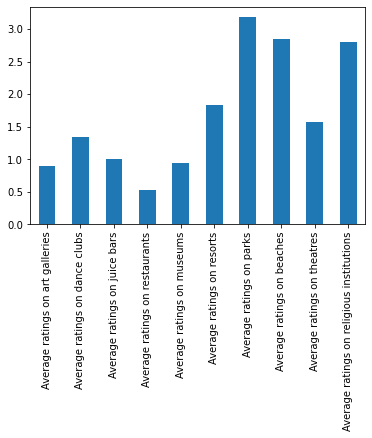

In [7]:
# Rank the categories by highest average:
TAAvg = TAData.mean(axis=0).round(2)
print(TAAvg.sort_values(ascending = False))
TAAvg.plot.bar()

From this chart we can see that parks and beachs have the highest average rating, along with religious institutions. 

Next lets look at the Europe data (Google)

In [10]:
# Rank the categories by highest average:
avg = googleData.mean(axis = 0).round(2)
print(avg.sort_values(ascending = False))

Average ratings on malls                    3.35
Average ratings on restaurants              3.13
Average ratings on theatres                 2.96
Average ratings on museums                  2.89
Average ratings on pubs/bars                2.83
Average ratings on parks                    2.80
Average ratings on zoo                      2.54
Average ratings on beaches                  2.49
Average ratings on resorts                  2.32
Average ratings on art galleries            2.21
Average ratings on juice bars               2.19
Average ratings on hotels/other lodgings    2.13
Average ratings on burger/pizza shops       2.08
Average ratings on view points              1.75
Average ratings on gardens                  1.56
Average ratings on monuments                1.53
Average ratings on churches                 1.46
Average ratings on dance clubs              1.19
Average ratings on beauty & spas            1.00
Average ratings on bakeries                 0.97
Average ratings on c

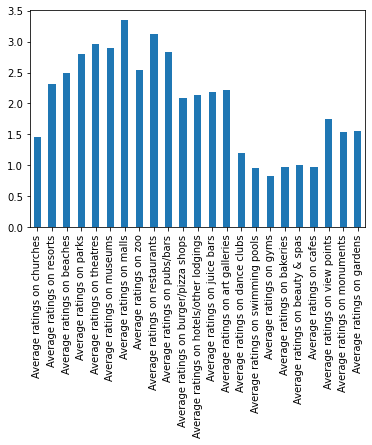

In [11]:
avg.plot.bar() # This dataset has a fairly wide range of average category scores

From the chart above we see that there are many types of attractions that all have high and similar ratings to one another. Particularly we can see that malls and resturants are two of the highest. 

In [12]:
# Figure out the ratio of reviews above 1 (2 is a rating of average).
mostLike = []
for col in TAColumns[1:]:
    mask = (TAData[col] >= 1)
    try:
        ratio = (mask.value_counts()[True] / (mask.value_counts()[False]+mask.value_counts()[True]))*100
        print(str(ratio.round(2)) + '% users considered near average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% users considered near average or above for', col)
        mostLike.append(col)
print('--------------------------------------')
print('Attractions that most people think are near average or above:') 
TAData[mostLike].head()

27.14% users considered near average or above for Average ratings on art galleries
82.76% users considered near average or above for Average ratings on dance clubs
44.9% users considered near average or above for Average ratings on juice bars
3.16% users considered near average or above for Average ratings on restaurants
40.61% users considered near average or above for Average ratings on museums
95.31% users considered near average or above for Average ratings on resorts
100% users considered near average or above for Average ratings on parks
100% users considered near average or above for Average ratings on beaches
97.86% users considered near average or above for Average ratings on theatres
100% users considered near average or above for Average ratings on religious institutions
--------------------------------------
Attractions that most people think are near average or above:


,Average ratings on dance clubs,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,
User 1,1.8,2.42,3.19,2.79,1.82,2.42
User 2,2.2,3.18,3.21,2.63,1.86,2.32
User 3,0.8,1.54,3.18,2.80,1.31,2.50
User 4,1.8,1.52,3.18,2.96,1.57,2.86
User 5,1.2,2.02,3.18,2.78,1.18,2.54


This table shows the ratios of ratings above 1 per category. A rating of 2 is considered average for a rating on trip advisor, thus we can which categories users thought were near or above average. We see that tourists in Asia seem to like resorts, parks, beaches, and religious sites across the board. For the other categories, most users seemed to deem them not up to average  

We tried the same with the Google data but chose 2 as the baseline number since a 3 is considered average in Google reviews, below the resulting table.

In [14]:
mostLike = []
for col in googleData[1:]:
    #print(col)
    mask = (googleData[col] >= 2)
    try:
        ratio = (mask.value_counts()[True] / (mask.value_counts()[False]+mask.value_counts()[True]))*100
        print(str(round(ratio,2)) + '% users gave near average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% users considered near average or above for', col)
print('--------------------------------------')
print('Attractions that most people think are near average or above:') 
googleData[mostLike].head()

20.66% users gave near average or above for Average ratings on churches
48.68% users gave near average or above for Average ratings on resorts
53.83% users gave near average or above for Average ratings on beaches
62.87% users gave near average or above for Average ratings on parks
64.35% users gave near average or above for Average ratings on theatres
64.81% users gave near average or above for Average ratings on museums
73.08% users gave near average or above for Average ratings on malls
55.41% users gave near average or above for Average ratings on zoo
71.19% users gave near average or above for Average ratings on restaurants
66.33% users gave near average or above for Average ratings on pubs/bars
33.98% users gave near average or above for Average ratings on burger/pizza shops
29.53% users gave near average or above for Average ratings on hotels/other lodgings
30.92% users gave near average or above for Average ratings on juice bars
32.17% users gave near average or above for Avera

,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars
Unique user id,,,,,,,,
User 1,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64
User 2,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65
User 3,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64
User 4,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64
User 5,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64


This table shows the ratios of ratings above 1 per category. A rating of 2 is considered average for a rating on trip advisor, thus we can see which categories users thought were near or above average. From a glance, we see that parks, beaches, and theaters are popular. However, we can also see some attractions popular in Asia are not as popular in Europe, ex. dance clubs. 


To reach a more direct analysis between the two datasets, we decided to isolate the categories common to both.

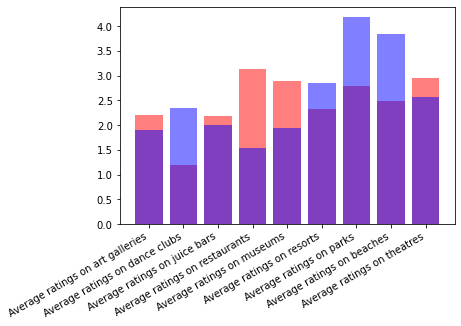

In [15]:
commonCategories =[
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]
taCopy = TAData.copy()
taCopy[commonCategories] += 1 # add one to all TA data to make the scales of google and TA match 
a = googleData[commonCategories].mean()
b = taCopy[commonCategories].mean()

plt.figure(1)
plt.clf()
plt.bar(commonCategories,a, color = 'r', label='Google Data', alpha=.5)
plt.bar(commonCategories,b, color = 'b', label='Trip Advisor Data', alpha=.5)
plt.xticks(rotation= 30,ha="right")
plt.legend=True
plt.stack = False
plt.show()

**Google Data in Red**     

**Tripadvisor Data in Blue**

The graph above compares the average ratings between the EU and Asia data in the common categories. We see that things like resturants and juice bars are higher rated in Europe while parks and beaches are rated higher in Asia. There seems to be more of an affinity for the outdoors in Asia 

## Part 4: Investigating Relationships

While these initial comparisons were interesting we wanted to check if there is any correlation between certain categories within the data sets

In [16]:
import json
import math
googleCor = {}
for i in googleData:
    googleCor[i] = []
    for j in googleData: # loop through google data
        if i == j:
            continue
        if abs(googleData[i].corr(googleData[j])) > 0.5: # .5 is considered the baseline for correlation
            googleCor[i].append((j,round(googleData[i].corr(googleData[j]), 4))) # if greater than .5 append
googleCor = {key:val for key, val in googleCor.items() if val != []}  # get rid of attributes with no corr
pd.DataFrame(googleCor.values(), index=googleCor.keys()) # turn into a df

,0,1
Average ratings on parks,"(Average ratings on theatres, 0.6269)",None
Average ratings on theatres,"(Average ratings on parks, 0.6269)",None
Average ratings on zoo,"(Average ratings on restaurants, 0.5369)","(Average ratings on pubs/bars, 0.5514)"
Average ratings on restaurants,"(Average ratings on zoo, 0.5369)","(Average ratings on pubs/bars, 0.5641)"
Average ratings on pubs/bars,"(Average ratings on zoo, 0.5514)","(Average ratings on restaurants, 0.5641)"
Average ratings on hotels/other lodgings,"(Average ratings on juice bars, 0.5123)",None
Average ratings on juice bars,"(Average ratings on hotels/other lodgings, 0.5...",None
Average ratings on swimming pools,"(Average ratings on gyms, 0.5138)",None
Average ratings on gyms,"(Average ratings on swimming pools, 0.5138)",None


This table shows the correlations between average ratings greater than 50% for the Google Dataset. Some of these correlations are consistent with our intuition (ex: Restaurants + Bars, or Gyms + Pools) whereas some represent less obvious trends. The highest correlation between categories is between parks and theaters.

In [17]:
TACor = {}
for i in TAData:
    TACor[i] = []
    for j in TAData:
        if i == j:
            continue
        if abs(TAData[i].corr(TAData[j])) > 0.5:
            TACor[i].append((j,round(TAData[i].corr(TAData[j]), 4)))
TACor = {key:val for key, val in TACor.items() if val != []} 
pd.DataFrame(TACor.values(), index=TACor.keys())

,0,1
Average ratings on juice bars,"(Average ratings on parks, 0.7507)",None
Average ratings on museums,"(Average ratings on resorts, 0.5813)",None
Average ratings on resorts,"(Average ratings on museums, 0.5813)",None
Average ratings on parks,"(Average ratings on juice bars, 0.7507)","(Average ratings on religious institutions, -0..."
Average ratings on religious institutions,"(Average ratings on parks, -0.7107)",None


This table shows the correlations between average ratings greater than 50% for the Tripadvisor Dataset. Similarly to the google dataset, some of the correlations are intuitive, whereas others are somewhat surprising. For example, the strong inverse correlation between parks and religious institutions.

## Part 5: Finding Clusters in our Data

To address our question of whether certain affinities are related to each other, we decided to run a clustering algorithm on our copies of our datasets that only contained the common elements. We decided to use K-Means Clustering since it seemed the a solid way to explore whether we had clusters and what they are. 

We used the Sklearn library to implement our model.

### Google Data

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

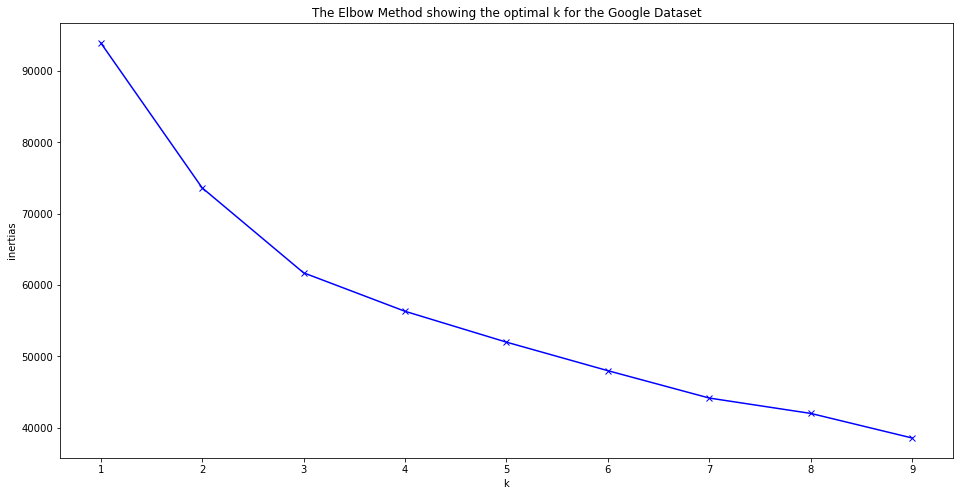

In [19]:
new = googleData[commonCategories]
inertias = []
for i in range(1,10): # run the algo 1-10 to plot inertias 
    model = KMeans(n_clusters=i) 
    model.fit(new) # run mode for current k
    inertias.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k for the Google Dataset')
plt.show()

To choose an optimal K Clusters, we decided to analyze inertia (sum of squared distances) and check where the "elbow" of our graph is. We arrive at an optimal K = 3.

Below we run our model and plot the results.  

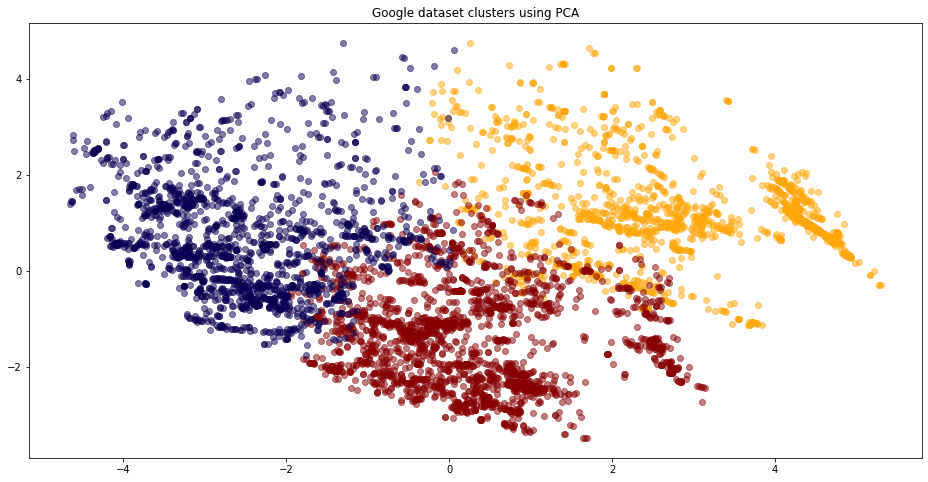

In [20]:
kmeans = KMeans(n_clusters=3) # set clusters = 3
kmeans.fit(new) # run model
clusterNames = kmeans.labels_


X = new
y = clusterNames
target_names = [0,1,2]

pca = PCA(n_components=2) # reduce dimesions of the data using PCA and LDA
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# # Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.figure(figsize=(16,8))

colors = ['#ffa60a', '#880000', '#0a0054',]

for color, i, target_name in zip(colors, range(0,4), target_names): # plot clusters
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)

plt.title('Google dataset clusters using PCA')

plt.show()

To visualize our clusters, we needed to reduce the dimensionality of our data. To achieve this, we applied Principal Component Analysis (PCA). We tried other methods, including Linear Discriminant Analysis, but the assumptions it uses to extract feature subspaces did not produce compelling visualizations of our clusters. We found that LDA (Below)'s feature subspaces did not coincide with the cluters identified by the K-Means algorithm. The result is an uncompelling visualization, so we decided to stick with PCA.

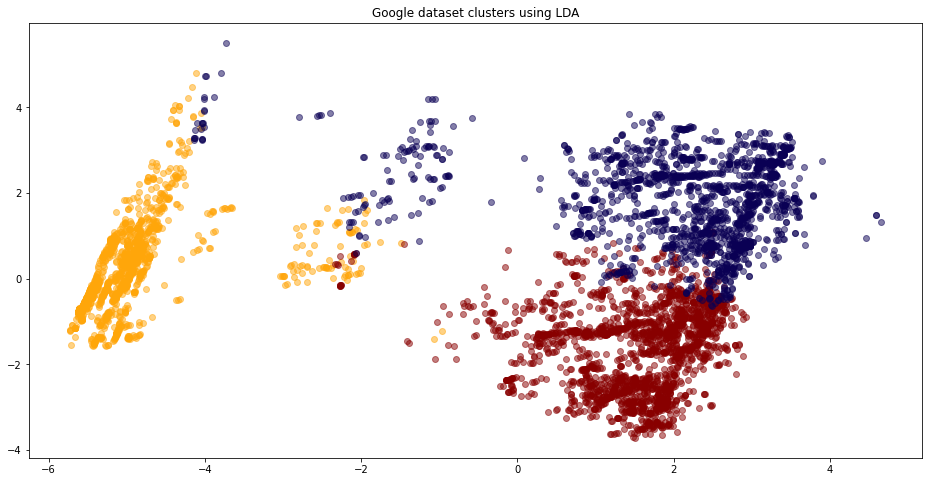

In [22]:
plt.figure(figsize=(16,8))
for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.5, color=color,
                label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Google dataset clusters using LDA')
plt.show()

One problem we ran into while visualizing our clusters has to do with the non-deterministic nature of the K-Means algo. Because the algorithm randomizes the initial centroids, the resulting clusters are not exactly the same between iterations. As a result, our visuals and the colors corresponding to clusters moved around between iterations. 

Below, we loop through the our data and split the points based on their clusters and show the average ratings to paint a picture for users in each cluster.

In [23]:
people = list(clusterNames)

zero = []
one = []
two = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)
    else:
        two.append(i)

In [26]:
new.iloc[zero].mean().round(4) # Yellow cluster

Average ratings on art galleries    4.9042
Average ratings on dance clubs      1.3419
Average ratings on juice bars       3.2400
Average ratings on restaurants      3.4307
Average ratings on museums          2.4752
Average ratings on resorts          2.0770
Average ratings on parks            2.1106
Average ratings on beaches          2.1354
Average ratings on theatres         2.1639
dtype: float64

In [27]:
new.iloc[one].mean().round(4) # Red cluster

Average ratings on art galleries    1.1646
Average ratings on dance clubs      1.1434
Average ratings on juice bars       2.0764
Average ratings on restaurants      3.4416
Average ratings on museums          2.6127
Average ratings on resorts          2.1238
Average ratings on parks            2.1542
Average ratings on beaches          2.0057
Average ratings on theatres         2.3213
dtype: float64

In [28]:
new.iloc[two].mean().round(4) # Blue cluster

Average ratings on art galleries    1.3221
Average ratings on dance clubs      1.1337
Average ratings on juice bars       1.4847
Average ratings on restaurants      2.4863
Average ratings on museums          3.5817
Average ratings on resorts          2.7602
Average ratings on parks            4.1527
Average ratings on beaches          3.3783
Average ratings on theatres         4.3966
dtype: float64

Because we are in an unsupervised learning environment, at some point, a human with domain expertise will need to intervene to label the clusters.

So a data analyst at a travel company might look at the mean review scores for these clusters and assign labels to help communicate the insight to management.

0. Strong preference for Theaters, Parks, and Museums. **"The Cultured Urbanite"**
1. Mostly low scores across the board. **"The Pessimist"**
2. Loves art galleries. **"The Art Connaisseur"**


These kinds of qualitative labels for clusters of user data are more compelling with the introduction of psychographic features.

### Tripadvisor Data

We applied the same methodology to determine the optimal number of clusters for the dataset from Tripadvisor. Ultimately, we arrived at 2 clusters.

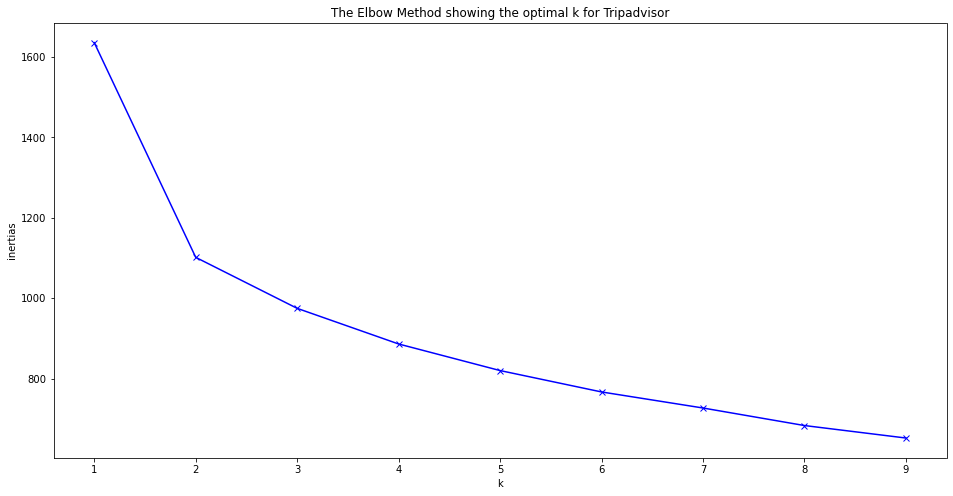

In [30]:
TANew = TAData[commonCategories] + 1 # to give the data the same scale as the google data 
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(TANew)
    inertias.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k for Tripadvisor')
plt.show()

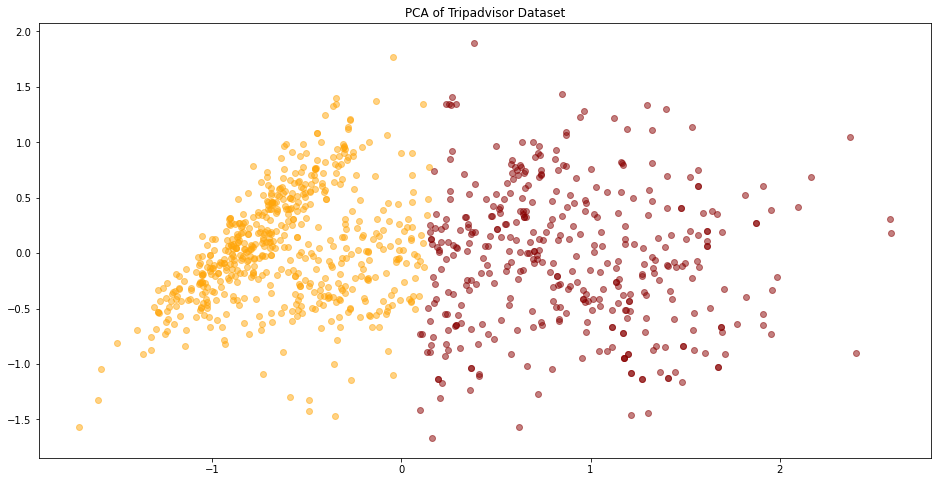

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(TANew)
clusterNames = kmeans.labels_

X = TANew
y = clusterNames
target_names = [0,1]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# # Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.figure(figsize=(16,8))
colors = ['#ffa60a', '#880000', '#0a0054',]

for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)
plt.title('PCA of Tripadvisor Dataset')

plt.show()

In [33]:
people = list(clusterNames)

zero = []
one = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)


In [199]:
TANew.iloc[zero].mean() #Yellow Cluster

Average ratings on art galleries    1.901940
Average ratings on dance clubs      2.413333
Average ratings on juice bars       2.805124
Average ratings on restaurants      1.574751
Average ratings on museums          2.161592
Average ratings on resorts          3.156517
Average ratings on parks            4.186816
Average ratings on beaches          3.808184
Average ratings on theatres         2.524229
dtype: float64

In [200]:
TANew.iloc[one].mean() # Red Cluster

Average ratings on art galleries    1.887111
Average ratings on dance clubs      2.310381
Average ratings on juice bars       1.462595
Average ratings on restaurants      1.503114
Average ratings on museums          1.785433
Average ratings on resorts          2.624775
Average ratings on parks            4.176851
Average ratings on beaches          3.853754
Average ratings on theatres         2.600882
dtype: float64

After applying the same methods to the trip advisor data, we saw two clusters that are relativly similar. This data might not have any separable features, and the relatively small scale of the data set could also be limiting our clustering efforts. For these reasons, we did not attempt to assign qualitative labels to these clusters like we did in the Google Dataset.

## Part 6: Predicting Ratings

Based on the clusters we found, we wondered if we could predict a user's rating for a attraction based on their other ratings. To answer this question we decided to use the K-Closest neighbors algorithm and test a few example users to see if we could predict their ratings. 

Below we set up a sample user whos ratings were similar to an average user from the cluster that loves art galleries. 

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

kNData = googleData[commonCategories]

features = [ # set up features 
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

xTrainDict = kNData[features].to_dict(orient='records') # defining training data
xNewDict = [{ # assign values
    'Average ratings on art galleries' : 4.9,
    'Average ratings on dance clubs': 1.34,
    'Average ratings on juice bars': 3.24,
    'Average ratings on museums': 2.5,
    'Average ratings on resorts': 2.1,
    'Average ratings on parks': 2.11,
    'Average ratings on beaches': 2.14,
    'Average ratings on theatres' : 2.16
}]
yTrain = kNData['Average ratings on restaurants'] # what we want to find out 

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

(29, -0.6520099293228659)


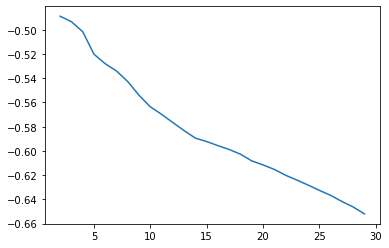

In [37]:
average = 0
MAE = {}
low = (0,0)
for i in range(2,30):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() > low[1]: #store value if lower 
        low = (i,scores.mean()) 
print(low)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

The range above is very small and targeted. We selected this range after trial and error since the algo takes a significantly long time to run. We couldnt run the algorithm from 1-1000 without almost bricking our computer.The graph however does not provide us with any help since it continues decreasing throughout the range. We are not sure why this is happening, we are assuming this means that we should just use the highest possible k. 

However, when we tested different ks through trial and error, we actually found that k=1900 is around the closest we can get to the actual average, thus we suspect the real k is around there. We are not sure why this is not reflected in the graph. 
### Hi Sam from the future here, this is textbook overfitting

To create a model that generalizes well to new data, we conducted a k-nearest-neighbors regression with 5-fold crossvalidation. We tested K's 

In [55]:
vec.fit(xTrainDict)
X_train = vec.transform(xTrainDict) # create training obj
X_new = vec.transform(xNewDict)

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train) # scale obj
X_new_sc = scaler.transform(X_new)

model = KNeighborsRegressor(n_neighbors=1900)
model.fit(X_train_sc, yTrain)
print(model.predict(X_new_sc))

[3.34353158]


After running the algo with n=1400 we get around a 3.34 rating for resturants which is close to the actual average (~3.4). This result has two key takeaways: 
1. We can see that the results from our clusters are staying consistent.
2. We can predict a missing rating with some accuracy using data from our clusters.

Below we use the same methods on the Asia dataset

### TripAdvisor Data

In [34]:
TAKData = TAData[commonCategories] +1
features = [ 
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

xTrainDict = TAKData[features].to_dict(orient='records') # defining training data
xNewDict = [{
    'Average ratings on art galleries' : 1.9,
    'Average ratings on dance clubs': 2.3,
    'Average ratings on juice bars': 1.5,
    'Average ratings on museums': 1.8,
    'Average ratings on resorts': 2.6,
    'Average ratings on parks': 4.2,
    'Average ratings on beaches': 3.9,
    'Average ratings on theatres' : 2.6
}]

yTrain = TAKData['Average ratings on restaurants'] # what we want to find out 
vec = DictVectorizer(sparse=False)


scaler = StandardScaler()


(779, -0.13921572659872677)


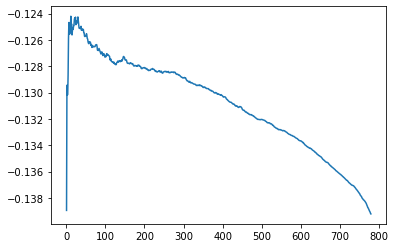

In [51]:
MAE = {}
low = (0,0)
for i in range(1,780):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() < low[1]: #store value if lower 
        low = (i,scores.mean()) 
print(low)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

The graph above is pretty alarming since we never see the MAE level out. This is probably due to the fact that the Asia dataset is small at only ~900 rows. Thus when we ran the algo we used k=800 which is pretty much the max k we could use and gave us the rating closest to the actual average. 

In [48]:
vec.fit(xTrainDict)
X_train = vec.transform(xTrainDict)
X_new = vec.transform(xNewDict)

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)


model = KNeighborsRegressor(n_neighbors=800)
model.fit(X_train_sc, yTrain)
print(model.predict(X_new_sc))

[1.5264625]


Although determining k was a little tricky, the result of 1.53 is very close to the actual average for the specific cluster we were testing (actual average ~1.50) which lets have the same takeaways as the Europe data! 

1. We can see that the results from our clusters are staying consistant.
2. We can predict a missing rating with some accuracy using data from our clusters.


While these are just two examples, we think this model could be easily be used for many other examples. We think our tests with these two users lets us find our key takeaways. 

## Part 7: Applications of our work

A predictive model has many applications within the monetization of a review platform. For example, after you leave a review for the restaurant where you just ate a meal, the app could recommend a place to get desert. To illustrate this idea, we created a simple mockup of how this interface could be implemented.

![title](img/RecommenderSystemMockup2.png)

Understanding who is more likely to respond to an app's recommendations means advertising space can be allocated more efficiently.

## Part 8: Conclusion